<a href="https://colab.research.google.com/github/abhyudyasangwan/Emotion_Classification/blob/main/HappySadCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import tensorflow as tf
import os #navigate file structures(join paths, list dir)
import cv2 #image processing(load the image, visualise it)
import imghdr #check image extensions
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import cv2 #image processing(load the image, visualise it)
import imghdr #check image extensions

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#Cleaning the data



In [ ]:
#1)Remove all images <10kb

#2)Manually clean the data

#3)Filter valid extensions:

data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] #extensions we are fine with

In [ ]:
for image_class in os.listdir(data_dir): #looping thorugh all the folders ie happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)): #looping through all images
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) #matches our extensions
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #if not, then we are removing it
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/sad-young-woman-feeling-stressed-footage-107160392_iconl.webp
Image not in ext list data/sad/sad-person-pictures-1920-x-1270-5jatnx06kaizb3sc.jpg
Image not in ext list data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in ext list data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data/sad/sad-man-crying-late-at-night-732x549-thumbnail.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
Image no

#Loading data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data') #builds image datasets(labels,classes), already performs a lot of preprocessing(re-sizing)(shuffle)

Found 268 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() #can't directly do data[0], make it a numpy iterator first

In [ ]:
batch = data_iterator.next()

In [ ]:
batch #[0] is the images, [1] is the labels

In [ ]:
batch[0].shape #batch size, size, channels(rgb)

(32, 256, 256, 3)

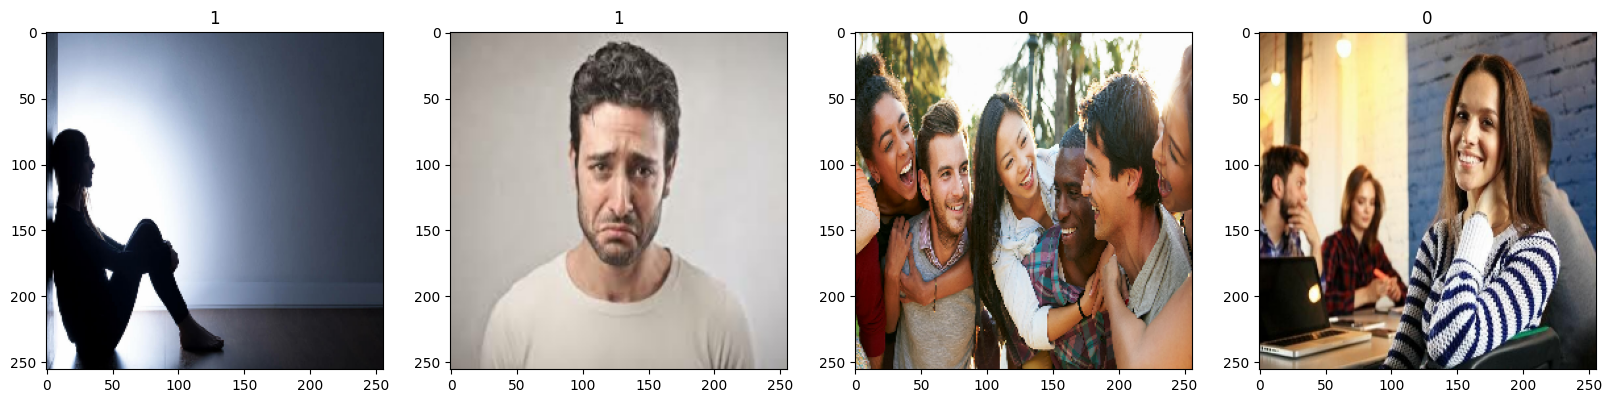

In [ ]:
#happy==0 sad==1
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Preprocessing Data

In [ ]:
#scaling data
def normalize_img(image, label):
    # Normalize the image to [0, 1] range for better results
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

data = data.map(normalize_img) #appying the transformation


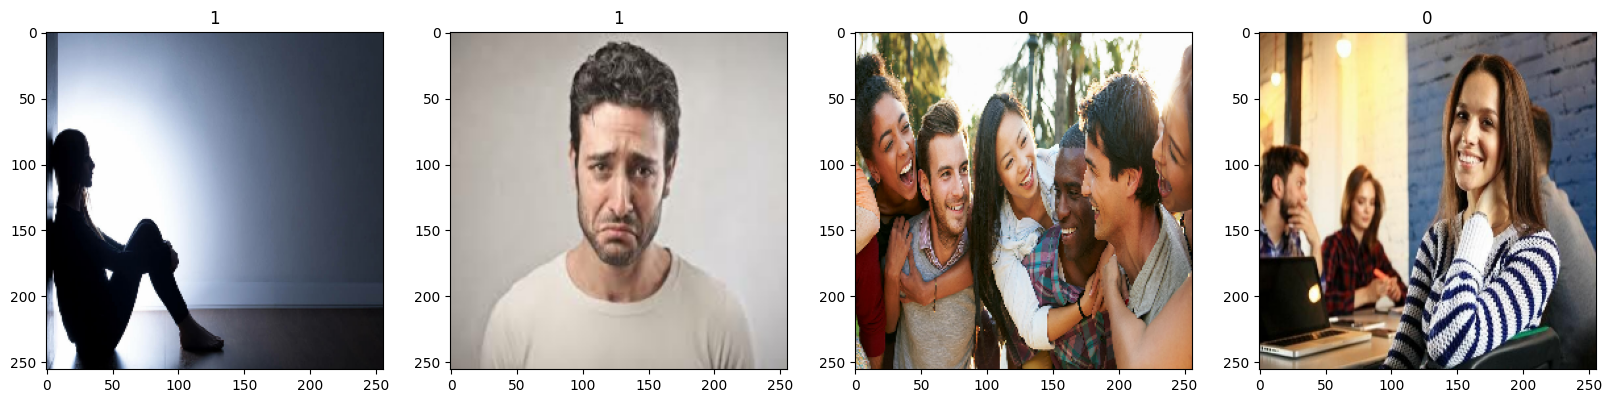

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

#Splitting data

In [ ]:
len(data) #9 batches 32

9

In [ ]:
train_size = int(len(data)*.7)#6 70% of our data
val_size = int(len(data)*.2)+1 #2 20%
test_size = int(len(data)*.1)+1 #1 10%

In [ ]:
train_size+ val_size+ test_size

9

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size) #skip already allocated batches
test = data.skip(train_size+val_size).take(test_size)

#BUILDING THE DNN

In [ ]:
from tensorflow.keras.models import Sequential #api
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten, Dropout #layers

In [ ]:
model = Sequential()

##Creating layers

In [ ]:
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3))) #16 filters, 3*3 pixels, strides
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides = 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides = 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #condense into 1 value

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #sigmoid => 0 or 1

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

#TRAIN

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #board giving results

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) #1 epoch is 1 run over our dataset

Epoch 1/20
6/6 [==============================] - 17s 2s/step - loss: 1.1383 - accuracy: 0.5104 - val_loss: 0.6740 - val_accuracy: 0.5625
Epoch 2/20
6/6 [==============================] - 14s 2s/step - loss: 0.6830 - accuracy: 0.5052 - val_loss: 0.6770 - val_accuracy: 0.5312
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.6540 - accuracy: 0.6146 - val_loss: 0.5678 - val_accuracy: 0.7031
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 0.5750 - accuracy: 0.7500 - val_loss: 0.5566 - val_accuracy: 0.7344
Epoch 5/20
6/6 [==============================] - 14s 2s/step - loss: 0.5115 - accuracy: 0.8021 - val_loss: 0.5172 - val_accuracy: 0.8125
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.4161 - accuracy: 0.8542 - val_loss: 0.4581 - val_accuracy: 0.7969
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 0.3575 - accuracy: 0.8698 - val_loss: 0.3397 - val_accuracy: 0.8594
Epoch 8/20
6/6 [==================

#PLOTS

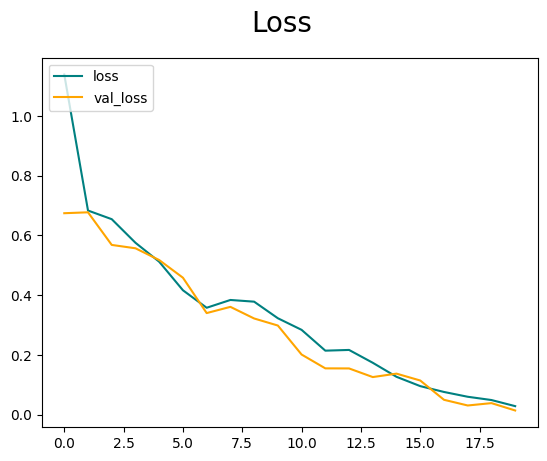

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

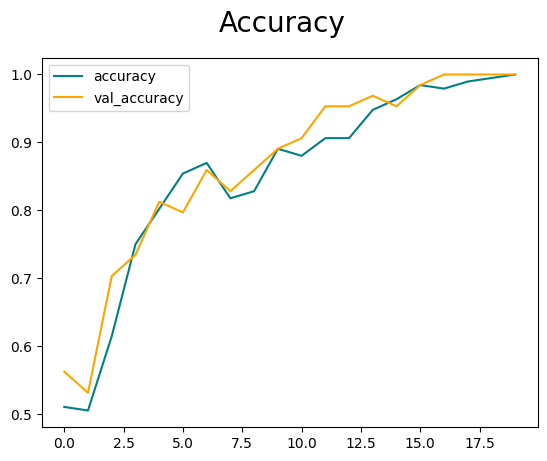

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 483ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


To Test write the following code:
import cv2

img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

yhat

if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')